In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv('drive/MyDrive/ColabNotebooks/elec.csv', skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   elec    476 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


In [36]:
df

,elec
0,1254
1,1290
2,1379
3,1346
4,1535
...,...
471,13032
472,14268
473,14473
474,15359


In [37]:
# Добавление меток месяцев
rows_in_df = 476
date_list = []
for i in range(1, rows_in_df + 1):
  date_list.append(i)
df['month'] = date_list
df

,elec,month
0,1254,1
1,1290,2
2,1379,3
3,1346,4
4,1535,5
...,...,...
471,13032,472
472,14268,473
473,14473,474
474,15359,475


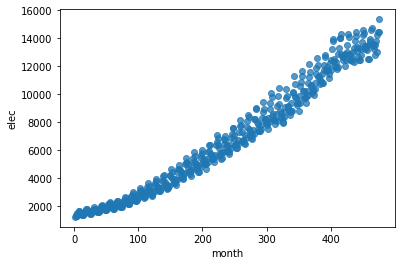

In [38]:
# График исходных данных

plt.scatter(df['month'],df['elec'], alpha=0.75)

plt.xlabel('month')
plt.ylabel('elec')
plt.show()

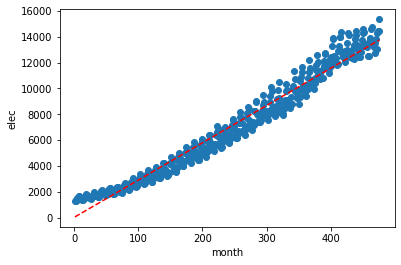

In [39]:
# Линия тренда
x = df['month']
y = df['elec']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('month')
plt.ylabel('elec')

plt.show()

In [40]:
# Построение модели регрессии
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y = df.iloc[:,:-1].values
X = df.iloc[:,1:].values

lr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

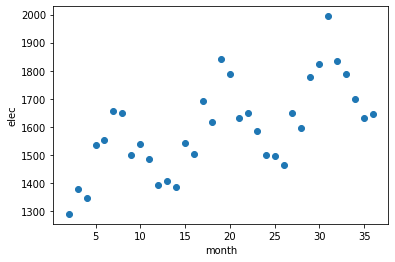

In [47]:
# Пример сезонности за 1 год.
plt.scatter(X[1:36], y[1:36]);

plt.xlabel('month')
plt.ylabel('elec')
plt.show()

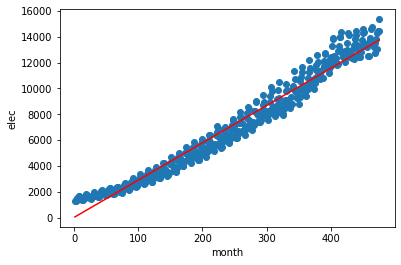

In [42]:
# Регрессия
y_lr = lr.predict(X)

plt.scatter(X, y);
plt.plot (X, y_lr, 'r');

plt.xlabel('month')
plt.ylabel('elec')
plt.show()

In [43]:
# Продление массива на 8 месяцев для создания предсказания
date_list = []
for i in range(477, 485):
  date_list.append(i)
z = np.concatenate((X, np.array(date_list).reshape(-1,1)), axis=0)

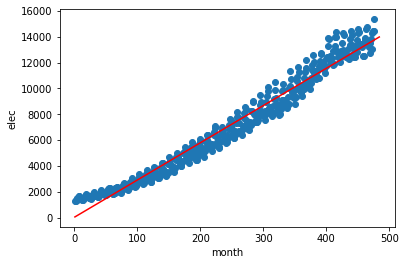

In [44]:
# Предсказание продаж
y_lr = lr.predict(z)

plt.scatter(X, y);
plt.plot (z, y_lr, 'r');

plt.xlabel('month')
plt.ylabel('elec')

plt.show()

In [45]:
#Продажи на прогназируемый период
print(y_lr[-8:])

[[13783.10466165]
 [13811.95177878]
 [13840.79889591]
 [13869.64601303]
 [13898.49313016]
 [13927.34024729]
 [13956.18736442]
 [13985.03448154]]
